# Housing Prices

Using this [Kaggle data](https://www.kaggle.com/anthonypino/melbourne-housing-market/data) create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanatory

Longtitude: Self explanatory

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [20]:
melbourne = pd.read_csv('Melbourne_housing_FULL.csv')
pd.set_option('display.max_columns', None)
melbourne.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [27]:
melbourne.Suburb.value_counts()

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Guys Hill            1
Monbulk              1
Cranbourne East      1
Botanic Ridge        1
Bulla                1
Name: Suburb, Length: 351, dtype: int64

In [21]:
melbourne.shape

(34857, 21)

In [22]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [40]:
#See categorical variable
categorical = melbourne.select_dtypes(include='object')
categorical

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
5,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
6,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan
7,Abbotsford,16 Maugie St,h,SN,Nelson,6/08/2016,Yarra City Council,Northern Metropolitan
8,Abbotsford,53 Turner St,h,S,Biggin,6/08/2016,Yarra City Council,Northern Metropolitan
9,Abbotsford,99 Turner St,h,S,Collins,6/08/2016,Yarra City Council,Northern Metropolitan


In [49]:
#See continous variable
int_float = melbourne.select_dtypes(include='int64' and 'float64')
int_float

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.80140,144.99580,4019.0
1,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.81140,145.01160,4019.0
4,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
5,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
6,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
7,NaN,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,-37.79650,144.99650,4019.0
8,NaN,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,-37.79950,144.99740,4019.0
9,NaN,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,-37.79960,144.99890,4019.0


In [51]:
int_float.columns

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


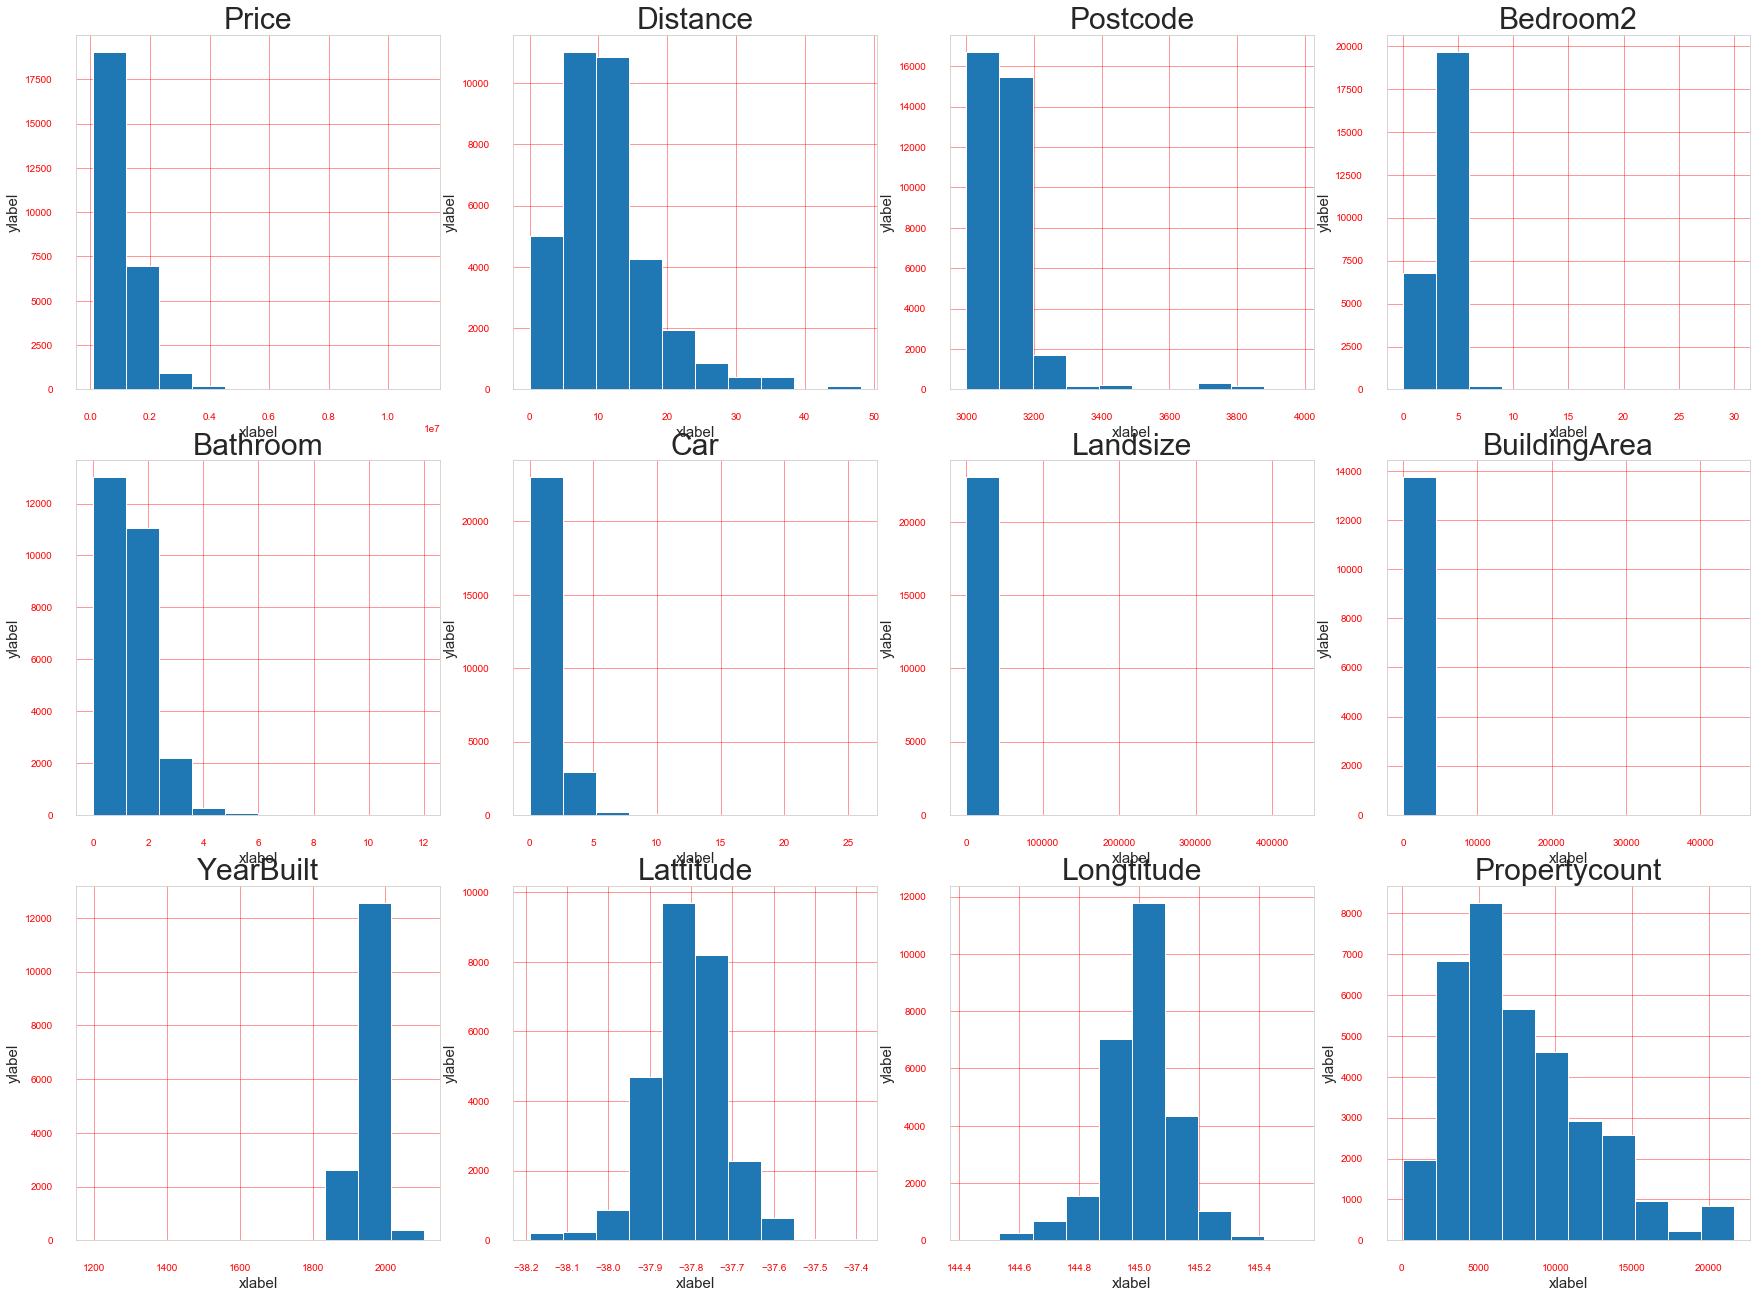

In [53]:
dic_col = {'Price':1, 'Distance':2, 'Postcode':3, 'Bedroom2':4, 'Bathroom':5, 'Car':6,
       'Landsize':7, 'BuildingArea':8, 'YearBuilt':9, 'Lattitude':10, 'Longtitude':11,
       'Propertycount':12}
# Check distribution in each variable using histogram.
plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(4,4,i)
    plt.hist(melbourne[variable])
  
   
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.tick_params(direction='out', length=20, width=20, colors='r',
               grid_color='r', grid_alpha=0.5)
    plt.title(variable, size = 30)

In [ ]:
categorical.columns

In [ ]:
dic_col = {'Price':1, 'Distance':2, 'Postcode':3, 'Bedroom2':4, 'Bathroom':5, 'Car':6,
       'Landsize':7, 'BuildingArea':8, 'YearBuilt':9, 'Lattitude':10, 'Longtitude':11,
       'Propertycount':12}
# Check distribution in each variable using histogram.
plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(4,4,i)
    plt.barplot(melbourne[variable])
  
   
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.tick_params(direction='out', length=20, width=20, colors='r',
               grid_color='r', grid_alpha=0.5)
    plt.title(variable, size = 30)

## Cleaning the dependent variable

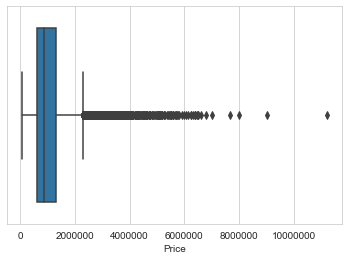

In [5]:
# Distribution showing outliers
sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.boxplot(melbourne.Price)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

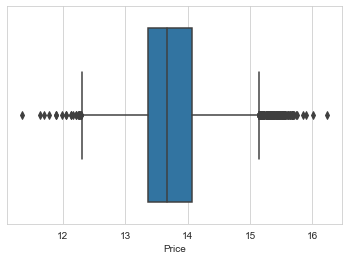

In [26]:
# Distribution after log
sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.boxplot(np.log(melbourne.Price.dropna()))
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

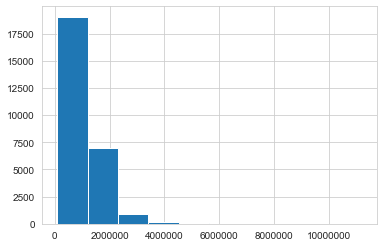

In [24]:
# Distribution of ln(Price)
fig, ax = plt.subplots()
plt.hist(melbourne.Price.dropna())
ax.ticklabel_format( style='plain')
plt.show()

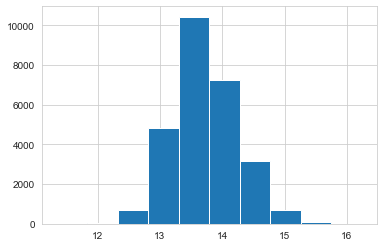

In [6]:
# Distribution of ln(Price)
fig, ax = plt.subplots()
plt.hist(np.log(melbourne.Price.dropna()))
ax.ticklabel_format( style='plain')
plt.show()

In [7]:
# Drop Price NaN
melbourne['Price'].dropna(inplace=True)

# Add new variable
melbourne['lnPrice'] = np.log(melbourne.Price)

In [ ]:
#Convert Date to datetime
melbourne['Date'] = pd.to_datetime(melb)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


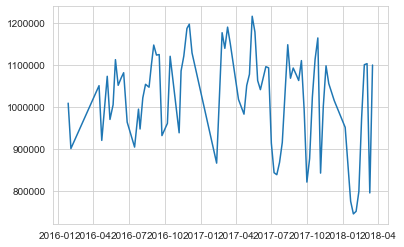

In [8]:
# Convert Date to datetime
melbourne["Date"] = pd.to_datetime(melbourne["Date"],dayfirst=True)

PriceMeans = melbourne.Price.groupby(melbourne.Date).mean()

# Needs to be index rather...

# Plot changes over time
plt.plot(PriceMeans)
plt.show()

## Cleaning feature set

In [31]:
melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_200
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,other
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,other
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,other
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,other
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,other


In [9]:
# Create new suburb variable for suburbs with more than 200 sales
suburblist = melbourne.Suburb.value_counts()
tokeep = list(suburblist.index[melbourne.Suburb.value_counts()>200])
print(tokeep)
# Create new suburb feature and set as categorical
melbourne['Suburb_200'] = melbourne.Suburb.where(melbourne.Suburb.isin(tokeep), 'other').astype('category')

# Drop 10 outliers in Landsize
melbourne = melbourne.loc[melbourne.Landsize<40000, :]

# Use BuildingArea where Landsize == 0 and where np.NaN
melbourne['Landsize_adj'] = melbourne.loc[:, 'Landsize']
melbourne.loc[melbourne['Landsize']<0.1, 'Landsize_adj'] = melbourne.loc[melbourne['Landsize']<0.1, 'BuildingArea'].values
#melbourne['Landsize_adj']=melbourne.Landsize.where(melbourne['Landsize']<0.1, melbourne['BuildingArea'])

# For remainder of Landsize_adj == 0 and np.Nan use avg Landsize based on suburb
melbourne['Landsize_adj'].fillna(melbourne.groupby('Suburb')['Landsize'].transform('mean'), inplace=True) 

['Reservoir', 'Bentleigh East', 'Richmond', 'Glen Iris', 'Preston', 'Kew', 'Brighton', 'Brunswick', 'South Yarra', 'Hawthorn', 'Northcote', 'Camberwell', 'Balwyn North', 'Essendon', 'Coburg', 'Glenroy', 'Brighton East', 'Pascoe Vale', 'St Kilda', 'Port Melbourne', 'Malvern East', 'Prahran', 'Thornbury', 'Bentleigh', 'Balwyn', 'Yarraville', 'Surrey Hills', 'Elwood', 'Moonee Ponds', 'Hawthorn East', 'Hampton', 'Toorak', 'Carnegie', 'Footscray', 'Doncaster', 'Craigieburn', 'Newport', 'Ascot Vale', 'Brunswick West', 'Mount Waverley', 'Burwood', 'Armadale', 'Glen Waverley', 'Ivanhoe', 'Keilor East', 'Maribyrnong', 'Malvern', 'Templestowe Lower', 'Fawkner', 'Williamstown', 'Melbourne', 'West Footscray']


In [10]:
# Create ln(Buildingsize) on Landsize_adj
melbourne['lnLandsize'] = np.log(melbourne.loc[:, 'Landsize_adj'])

# Set Type as categorical
melbourne['Type'] = melbourne.loc[:,'Type'].astype('category')

# Create suburb dummies
dummies = pd.get_dummies(melbourne.loc[:, ['Suburb_200', 'Type']])

# Drop unused columns and merge with dummies
X = pd.concat([melbourne.drop(['Address', 'Method', 'SellerG', 'Date',
                    'Postcode', 'Bedroom2', 'BuildingArea',
                    'YearBuilt', 'CouncilArea', 'Lattitude',
                    'Longtitude', 'Regionname', 'Price',
                    'Suburb', 'Type', 'Landsize_adj'], axis=1), 
               dummies],axis=1)

In [11]:
# Drop NaN
X.dropna(inplace=True)
print('20,611 originally', X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17689 entries, 1 to 34856
Data columns (total 65 columns):
Rooms                           17689 non-null int64
Distance                        17689 non-null float64
Bathroom                        17689 non-null float64
Car                             17689 non-null float64
Landsize                        17689 non-null float64
Propertycount                   17689 non-null float64
lnPrice                         17689 non-null float64
Suburb_200                      17689 non-null category
lnLandsize                      17689 non-null float64
Suburb_200_Armadale             17689 non-null uint8
Suburb_200_Ascot Vale           17689 non-null uint8
Suburb_200_Balwyn               17689 non-null uint8
Suburb_200_Balwyn North         17689 non-null uint8
Suburb_200_Bentleigh            17689 non-null uint8
Suburb_200_Bentleigh East       17689 non-null uint8
Suburb_200_Brighton             17689 non-null uint8
Suburb_200_Brighton East  

In [12]:
# Change to log
# Keep zeros as they contain information (change to 0.1)

X['lnRooms'] = np.log(melbourne.loc[:, 'Rooms'])
# 6 distance observations are 0, set to 0.1 instead (next nearest 0.8)
X['Distance'] = X.Distance.where(X.Distance>0.7, 0.1)
X['lnDistance'] = np.log(X.loc[:, 'Distance'])
# 34 Bathroom observations are 0, set to 0.1
X.loc[X.Bathroom==0, 'Bathroom'] = 0.1
X['lnBathroom'] = np.log(X.loc[:, 'Bathroom'])
# 1107 Car observations are 0, set to 0.1
X['Car'] = X.Car.where(X.Car>1, 0.1)
X['lnCar'] = np.log(X.loc[:, 'Car'])
X['lnPropertycount'] = np.log(melbourne.loc[:, 'Propertycount'])

In [13]:
# Drop unused variables, including base categories for categoricals
X.drop(['Rooms', 'Distance', 'Bathroom',
        'Car', 'Propertycount','Landsize',
       'Suburb_200_other', 'Type_u', 'Suburb_200'], axis=1, inplace=True)

In [32]:
X.head()

,lnLandsize,Suburb_200_Armadale,Suburb_200_Ascot Vale,Suburb_200_Balwyn,Suburb_200_Balwyn North,Suburb_200_Bentleigh,Suburb_200_Bentleigh East,Suburb_200_Brighton,Suburb_200_Brighton East,Suburb_200_Brunswick,Suburb_200_Brunswick West,Suburb_200_Burwood,Suburb_200_Camberwell,Suburb_200_Carnegie,Suburb_200_Coburg,Suburb_200_Craigieburn,Suburb_200_Doncaster,Suburb_200_Elwood,Suburb_200_Essendon,Suburb_200_Fawkner,Suburb_200_Footscray,Suburb_200_Glen Iris,Suburb_200_Glen Waverley,Suburb_200_Glenroy,Suburb_200_Hampton,Suburb_200_Hawthorn,Suburb_200_Hawthorn East,Suburb_200_Ivanhoe,Suburb_200_Keilor East,Suburb_200_Kew,Suburb_200_Malvern,Suburb_200_Malvern East,Suburb_200_Maribyrnong,Suburb_200_Melbourne,Suburb_200_Moonee Ponds,Suburb_200_Mount Waverley,Suburb_200_Newport,Suburb_200_Northcote,Suburb_200_Pascoe Vale,Suburb_200_Port Melbourne,Suburb_200_Prahran,Suburb_200_Preston,Suburb_200_Reservoir,Suburb_200_Richmond,Suburb_200_South Yarra,Suburb_200_St Kilda,Suburb_200_Surrey Hills,Suburb_200_Templestowe Lower,Suburb_200_Thornbury,Suburb_200_Toorak,Suburb_200_West Footscray,Suburb_200_Williamstown,Suburb_200_Yarraville,Type_h,Type_t,lnRooms,lnDistance,lnBathroom,lnCar,lnPropertycount
1,5.308268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.693147,0.916291,0.000000,-2.302585,8.298788
2,5.049856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.693147,0.916291,0.000000,-2.302585,8.298788
4,4.897840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.098612,0.916291,0.693147,-2.302585,8.298788
5,4.543295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.098612,0.916291,0.693147,-2.302585,8.298788
6,4.787492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.386294,0.916291,0.000000,0.693147,8.298788


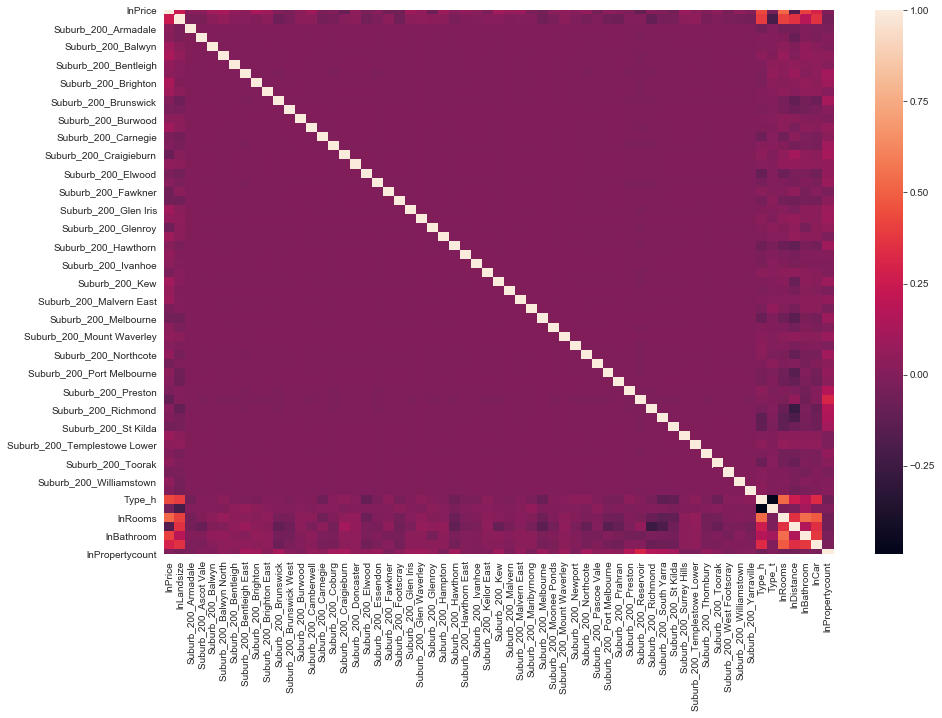

In [14]:
# Check correlations
plt.figure(figsize=(15,10))
sns.heatmap(X.corr())
plt.show()

In [16]:
from sklearn import model_selection

# Split out y
y = X.loc[:, 'lnPrice']
X.drop(['lnPrice'], axis=1, inplace=True)

# Splitting into train and test

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [34]:
X_train.shape

(13266, 61)

In [35]:
y_train

23160    14.339055
10489    15.250595
8670     13.337475
26225    13.864301
25789    13.937728
           ...    
29760    13.840203
10598    13.306350
18944    14.496079
5736     13.629181
17162    14.151983
Name: lnPrice, Length: 13266, dtype: float64

In [36]:
X.columns

Index(['lnLandsize', 'Suburb_200_Armadale', 'Suburb_200_Ascot Vale',
       'Suburb_200_Balwyn', 'Suburb_200_Balwyn North', 'Suburb_200_Bentleigh',
       'Suburb_200_Bentleigh East', 'Suburb_200_Brighton',
       'Suburb_200_Brighton East', 'Suburb_200_Brunswick',
       'Suburb_200_Brunswick West', 'Suburb_200_Burwood',
       'Suburb_200_Camberwell', 'Suburb_200_Carnegie', 'Suburb_200_Coburg',
       'Suburb_200_Craigieburn', 'Suburb_200_Doncaster', 'Suburb_200_Elwood',
       'Suburb_200_Essendon', 'Suburb_200_Fawkner', 'Suburb_200_Footscray',
       'Suburb_200_Glen Iris', 'Suburb_200_Glen Waverley',
       'Suburb_200_Glenroy', 'Suburb_200_Hampton', 'Suburb_200_Hawthorn',
       'Suburb_200_Hawthorn East', 'Suburb_200_Ivanhoe',
       'Suburb_200_Keilor East', 'Suburb_200_Kew', 'Suburb_200_Malvern',
       'Suburb_200_Malvern East', 'Suburb_200_Maribyrnong',
       'Suburb_200_Melbourne', 'Suburb_200_Moonee Ponds',
       'Suburb_200_Mount Waverley', 'Suburb_200_Newport',
       

## ORDINARY LEAST SQUARE REGRESSION

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

ols = sm.OLS(y_train, X_train)
result = ols.fit()
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     462.9
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:38:03   Log-Likelihood:                -2634.9
No. Observations:               13266   AIC:                             5392.
Df Residuals:                   13205   BIC:                             5849.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Conclusion

The R^2 is 67% indicates that the model explains most the variability of the response data around its mean. The price of the houses is predicted well by the independent variable landsize, type of house, number of rooms, bathrooms and carports and suburbs also add substantial value.
